In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [57]:
df= pd.read_csv(r'/content/sample_data/voice.csv')

In [58]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [59]:
len(df.columns)#tot columns

21

In [60]:
#taking x and y
x= df.drop(['label'], axis=1)
y= df['label']

In [10]:
# len(x.columns)

20

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


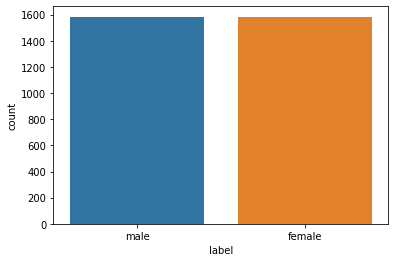

In [13]:
sns.countplot(y)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20)

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
dt= DecisionTreeClassifier(criterion="gini", max_depth= 5)

In [65]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [67]:
dt.score(x_train, y_train), dt.score(x_test, y_test)#diference of train and test is low so there is no obverfitting

(0.9846093133385951, 0.973186119873817)

In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
y_pred= dt.predict(x_test)

In [69]:
accuracy_score(y_test, y_pred)

0.973186119873817

In [70]:
confusion_matrix(y_test, y_pred)

array([[313,   7],
       [ 10, 304]])

In [71]:
x_test.iloc[0].to_numpy()
y_test.iloc[0]
#difference between .to_numpy() and to_array()

'female'

In [72]:
# Sample prediction
single_sample = x_test.iloc[0].to_numpy()
dt.predict([single_sample]) # make sure you pass the sample with an extra pair of "[]"

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['female'], dtype=object)

In [73]:
#lets visualize how our decision tree looks like
import graphviz
from sklearn import tree

In [74]:
dot_data= tree.export_graphviz(dt)
graph= graphviz.Source(dot_data)
graph.render('df')

'df.pdf'